# Macroscopic Fundamental Diagrams
## CEE 498- Transportation Economics

Noah Garfinkle

# References:
- http://web.mit.edu/sheffi/www/selectedMedia/sheffi_urban_trans_networks.pdf
- https://www.jstor.org/stable/pdf/25768196.pdf
- https://sboyles.github.io/teaching/ce392c/5-beckmannmsafw.pdf
- https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7967870
- https://link.springer.com/content/pdf/10.1007%2F978-3-319-00155-5.pdf
- https://link.springer.com/chapter/10.1007/978-3-319-00155-5_10


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import ortools as ort
from shapely.geometry import Point, LineString
import shapely.geometry as geom
from ortools.graph import pywrapgraph
import time

Step 1. Create a conceptual model of the road network

In [2]:
intersections = [Point(0,0),Point(3,0),Point(6,0),Point(0,3),Point(3,3),Point(6,3),Point(0,6),Point(3,6),Point(6,6)]

In [3]:
df_intersections = gpd.GeoDataFrame({"geometry":intersections})

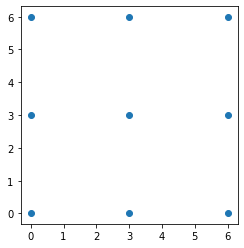

In [4]:
df_intersections.plot()

In [5]:
roads = []
for i in range(0,len(intersections)):
    for j in range(0,len(intersections)):
        if i < j:
            road = LineString([intersections[i],intersections[j]])
            roads.append(road)
df_roads = gpd.GeoDataFrame({"geometry":roads})

In [6]:
df_roads = df_roads[df_roads.geometry.length == 3]

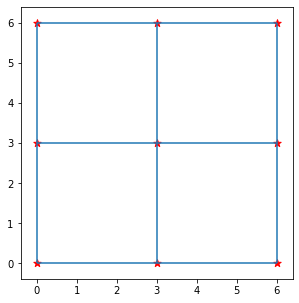

In [7]:
fig,ax = plt.subplots(figsize=(5,5))
df_roads.plot(ax=ax)
df_intersections.plot(ax=ax,marker="*",color='red',markersize=60)

In [8]:
def generateGrid(nRows=3,nCols=3,rowSpacing=3,colSpacing=3):
    points = []
    for row in range(0,nRows):
        x = row * rowSpacing
        for col in range(0,nCols):
            y = col * colSpacing
            point = Point(x,y)
            points.append(point)
    df = gpd.GeoDataFrame({'geometry':points})
    return df

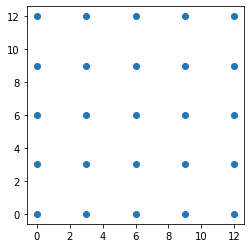

In [9]:
generateGrid(5,5).plot()

## Four-Step Travel Demand Model

- https://bfcog.us/transportation/gismapping-modeling/regional-travel-demand-model/four-step-travel-demand-model/
- https://www.transitwiki.org/TransitWiki/index.php/Four-step_travel_model
- https://github.com/bstabler/TransportationNetworks # an amazing link!
- https://sboyles.github.io/teaching/ce392c/hw5.html # an amazing site!
- https://github.com/teknomo/IdealFlowNetwork # python library
- https://www.hindawi.com/journals/jat/2019/9540386/
- https://github.com/spartalab/wrap


### 1. Trip generation- where do trips start?

### 2. Trip distribution- where do trips go?

### 3. Mode choice- how do people travel?

### 4. Trip assignment- what is the route for each trip?

In [12]:
# https://developers.google.com/optimization/assignment/assignment_min_cost_flow
def main():
  """Solving an Assignment Problem with MinCostFlow"""

  # Instantiate a SimpleMinCostFlow solver.
  min_cost_flow = pywrapgraph.SimpleMinCostFlow()
  # Define the directed graph for the flow.

  start_nodes = [0, 0, 0, 0] + [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4] + [5, 6, 7, 8]
  end_nodes =   [1, 2, 3, 4] + [5, 6, 7, 8, 5, 6, 7, 8, 5, 6, 7, 8, 5, 6, 7, 8] + [9, 9, 9, 9]
  capacities =  [1, 1, 1, 1] + [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] + [1, 1, 1, 1 ]
  costs  = ([0, 0, 0, 0] + [90, 76, 75, 70, 35, 85, 55, 65, 125, 95, 90, 105, 45, 110, 95, 115]
                + [0, 0, 0, 0])
  # Define an array of supplies at each node.
  supplies = [4, 0, 0, 0, 0, 0, 0, 0, 0, -4]
  source = 0
  sink = 9
  tasks = 4

  # Add each arc.
  for i in range(len(start_nodes)):
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],
                                                capacities[i], costs[i])

  # Add node supplies.

  for i in range(len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])
  # Find the minimum cost flow between node 0 and node 10.
  if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
    print('Total cost = ', min_cost_flow.OptimalCost())
    print()
    for arc in range(min_cost_flow.NumArcs()):

      # Can ignore arcs leading out of source or into sink.
      if min_cost_flow.Tail(arc)!=source and min_cost_flow.Head(arc)!=sink:

        # Arcs in the solution have a flow value of 1. Their start and end nodes
        # give an assignment of worker to task.

        if min_cost_flow.Flow(arc) > 0:
          print('Worker %d assigned to task %d.  Cost = %d' % (
                min_cost_flow.Tail(arc),
                min_cost_flow.Head(arc),
                min_cost_flow.UnitCost(arc)))
  else:
    print('There was an issue with the min cost flow input.')
if __name__ == '__main__':
  start_time = time.clock()
  main()
  print()
  print("Time =", time.clock() - start_time, "seconds")

Total cost =  265

Worker 1 assigned to task 8.  Cost = 70
Worker 2 assigned to task 7.  Cost = 55
Worker 3 assigned to task 6.  Cost = 95
Worker 4 assigned to task 5.  Cost = 45

Time = 0.00023670000000208802 seconds


C:\Users\garfink2\AppData\Local\Continuum\anaconda3\envs\phd\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\garfink2\AppData\Local\Continuum\anaconda3\envs\phd\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
